# Finding the reasons why employees leave the company and act accordingly.


An HR department have datasets about employess whom left the company, and to be later used to get insights to understand many problems.
Here i will use python to try to discover any patterns for employees that leave the company, to find why, and to see if their resignation is having an effect on the company, so that later we can decide on how to avoid this thing, with the use of Python i can create graphs to discover these patterns.


And with the use of these graphs, we can make a Powerpoint file to make a solid presentation later.

In [2]:
# first i will import some needed libraries for the task
# libraries that helps in dealing with datasets, numbers, preprocessing
# and sns and matlplotib libraries for visualization

import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Giving variables to datasets, cleaning and merging them.

In [3]:
# here i will define the datasets by giving them variable names, so that later i can do operations on them
df1 = pd.read_csv("employee_survey_data.csv")
df2 = pd.read_csv("general_data.csv")
df3 = pd.read_csv("manager_survey_data.csv")

In [4]:
# i will check the columns of the 3 datasets
# this can help to identify the unique and similar columns
df1.head(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [5]:
# the 2nd dataset have many columns so i had to order python to remove limits on the number of columns shown
pd.set_option('display.max_columns', None)
df2.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [6]:
df3.head(5)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [7]:
# see the number of rows and columns to make sure the number of rows match
print(df1.shape, df2.shape, df3.shape)

(4410, 4) (4410, 24) (4410, 3)


In [8]:
# here i will start by looking into null cells
# i might remove some empty cells to get better visualization
# but it's also possible that the null cells are basically just 0 values
# i will replace the possible 0 cells with 0, and remove the others as they might not help us in visualizaing data
df1null = df1.isna().sum()
df2null = df2.isna().sum()
df3null = df3.isna().sum()
print(df1null, df2null, df3null)

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64 Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64 EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64


In [9]:
# some employees didn't work in previous companies and didn't had previous experience
df2['NumCompaniesWorked'] = df2['NumCompaniesWorked'].fillna(0)
df2['TotalWorkingYears'] = df2['TotalWorkingYears'].fillna(0)

In [10]:
# find and delete duplicate values
df1duplicate = df1.duplicated().sum()
df2duplicate = df2.duplicated().sum()
df3duplicate = df3.duplicated().sum()
print(df1duplicate, df2duplicate, df3duplicate)

0 0 0


In [11]:
# i will merge the 3 datasets together
# first dataset 1 and 2
# then merge with the 3rd dataset
df11 = pd.merge(df1 ,df2)
df = pd.merge(df11, df3)
# then remove the null values
df = df.dropna()
df

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,3.0,4.0,3.0,29,No,Travel_Rarely,Sales,4,3,Other,1,Female,2,Human Resources,Single,35390,1.0,Y,18,8,0,6.0,2,6,1,5,2,3
4405,4406,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,3,3
4406,4407,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,2,3
4407,4408,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,3,4


# The Visualizations

Here i will make several types of different charts to look for patterns, or any indications that can lead to the effect of some features on employees leaving a company.

And i will also try to look for any negative effects the attrition is having on the company and if the company is wasting any not resources on training these employees or losing high performance employees.

In [12]:
# first i will extract the time employees spent in the company before the current manager
# as this might help me compare data in later steps
df['yearsbeforelastmanager'] = df['YearsAtCompany']-df['YearsWithCurrManager']
# then i will divide the dataset to 2, one for employees that left the company
# and the other is the employees who stayed.
# as splitting the 2 groups might help us in getting better visualizations
df_stayed = df[df['Attrition'] == 'No']
df_left = df[df['Attrition' ] == 'Yes']

1) Relation between monthly income and attrition

<ipython-input-13-6f36a6ae3b82>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome' , data = df, palette = Color)


Text(0, 0.5, 'Monthly income')

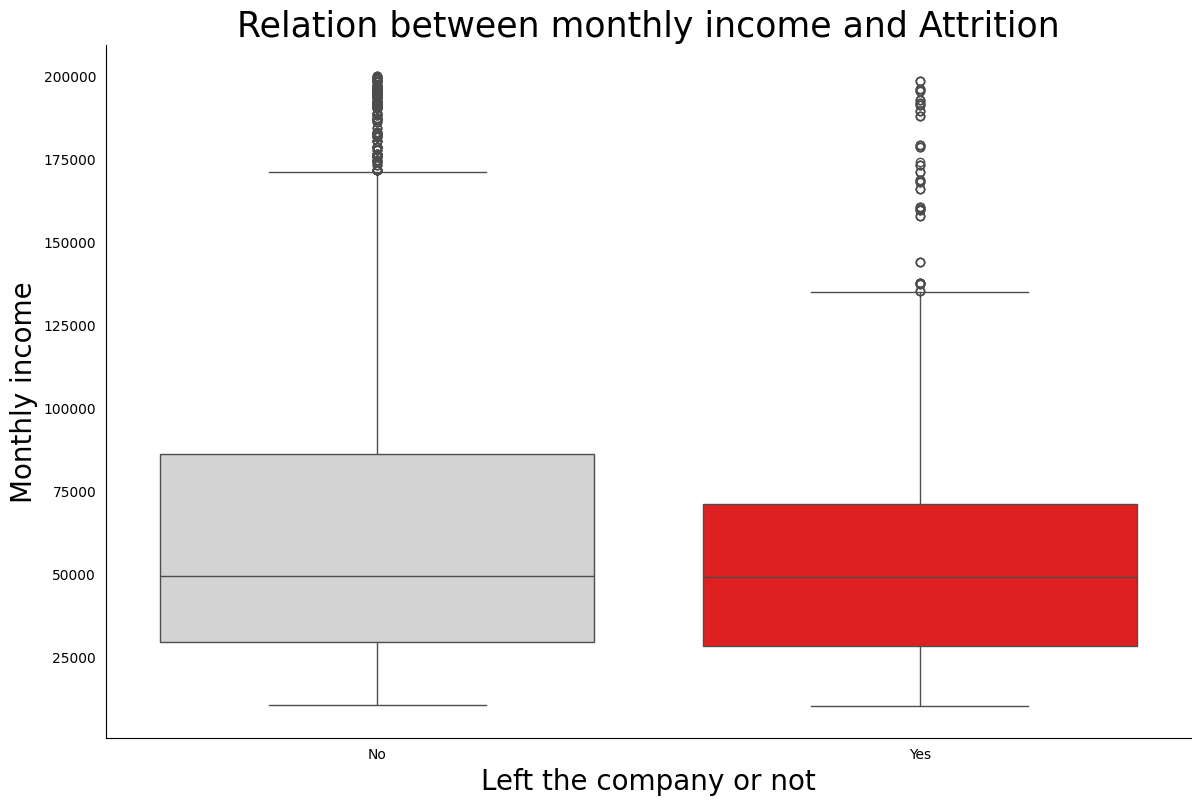

In [13]:
# here i will use a box plot to see the relation between people leaving the company and the monthly income
# as boxplot can show both average and outliers

# setting the size of the chart
plt.figure(figsize=(14,9))
# setting the colors to use later, red is the color of the box of the group that left
# and color red inidicate danger
Color = {'Yes': 'red', 'No' : 'lightGrey'}
# doing the boxplot using sns
sns.boxplot(x='Attrition', y='MonthlyIncome' , data = df, palette = Color)
# remove the ticks on the left and bottom so the chart can look clearer
plt.tick_params(left=False, bottom=False)
# add a title for the chart with a good fontsize
plt.title('Relation between monthly income and Attrition', fontsize = 25)
# remove enclosure
sns.despine()
# add lables for the x and y axis
plt.xlabel('Left the company or not', fontsize = 20)
plt.ylabel('Monthly income', fontsize = 20)

2) Checking the effects of job envirnoment, job satsfication and work life balance on attrition

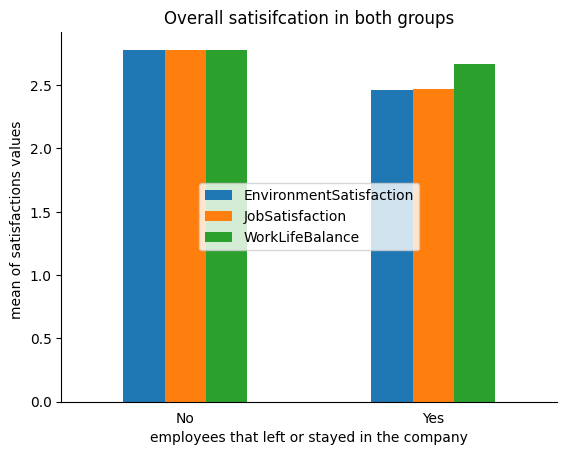

In [14]:
# here i will see how both groups differ in the satisfaction in their job conditions

# identify the columns i want to compare
satisfaction_columns = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
# use 'groupby' to divide the column between the Attrition groups
# and use 'mean' function to get the mean of the satisfaction levels for each attrition group
df.groupby('Attrition')[satisfaction_columns].mean().plot(kind='bar')

plt.title('Overall satisifcation in both groups')
sns.despine()
# the ticks n the left cna helpo identify the number but in the bottom they are not neccesary
plt.tick_params(bottom=False)
plt.xlabel('employees that left or stayed in the company')
plt.ylabel('mean of satisfactions values ')
# make x axis vlaues horizontal
plt.xticks(rotation = 0)
# use legend and put it in center so the chart can be fully visual
# and the audience know immediately what color to each column
plt.legend(loc='center')

3) Compare and Check for a relation between years working in the company and last time since getting a promotion, for both groups.

Text(0.5, 1.0, '')

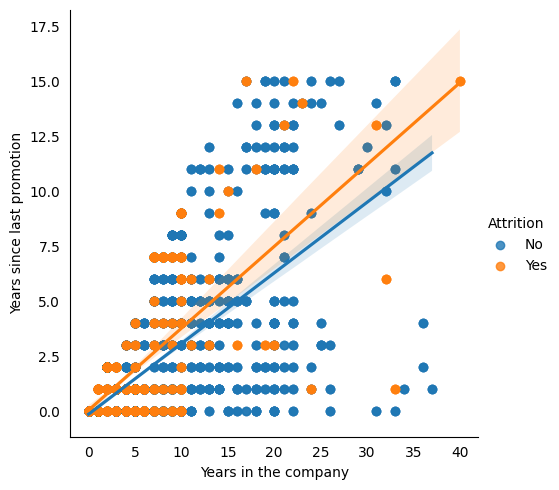

In [15]:
# i will look if promotion have effect on attrition by using lmplot
# with lmplot i can get a lines for average values to companre and also get points for differnt value combos

# use the sns for lmplot
sns.lmplot(data=df, x='YearsAtCompany', y='YearsSinceLastPromotion', hue='Attrition')
# remove x axis and and y axis ticks for better view
plt.tick_params(bottom=False, left=False)
plt.xlabel('Years in the company')
plt.ylabel('Years since last promotion')
# i don't need a title since it might take a lot of space from the chart
plt.title('')

4) Relation between time spent with current manager and attrition

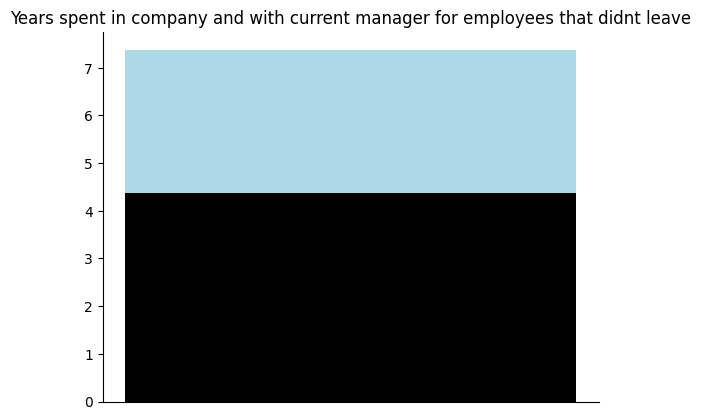

In [16]:
# here i will compare between the time both groups of employees spent in company as a whole
# or just with current manager
# i will make 2 charts, each for each group of people
# i am using a staked chart to see how years of employees that stayed are divieded between current manager and previous ones
# here i will visualize a staked bar chart for the employees that stayed

# creating variables for each column and the mean if needed
# attriotion is the categorical value and the years with current and previous managers are the numerical values
avg_yearscurrentmanager = df_stayed['YearsWithCurrManager'].mean()
avg_yearspreviousmanagers = df_stayed['yearsbeforelastmanager'].mean()
# making both parts of the bar with differnt colors
plt.bar('Attrition', avg_yearscurrentmanager, color='black')
plt.bar('Attrition', avg_yearspreviousmanagers, bottom =avg_yearscurrentmanager, color='lightblue')
# i am removing both ticks and labels from x axis as they are not needed
plt.tick_params(bottom=False,labelbottom = False)
plt.title('Years spent in company and with current manager for employees that didnt leave')
sns.despine()

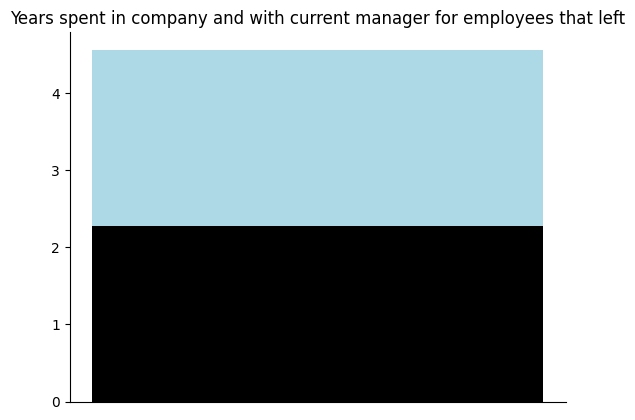

In [18]:
# a staked chart to see how years of employees that left are divieded between current manager and previous ones

# i will use similar codes as the similar block
avg_yearscurrentmanager = df_left['YearsWithCurrManager'].mean()
avg_yearspreviousmanagers = df_left['yearsbeforelastmanager'].mean()
plt.bar('Attrition', avg_yearspreviousmanagers, color='black')
plt.bar('Attrition', avg_yearspreviousmanagers, bottom =avg_yearspreviousmanagers, color='lightblue')
plt.tick_params(bottom=False, labelbottom = False)
plt.title('Years spent in company and with current manager for employees that left')
sns.despine()

5) Relation between monthly income after salary hike and attrition

In [19]:
# i will see if the increase in salary had an effect on attrition
# i will creat columns for the increase in a real number and then as the new total salary
df['salary * hike'] = df['MonthlyIncome']*df['PercentSalaryHike']
df['salary + hike'] = df['MonthlyIncome']*df['salary * hike']

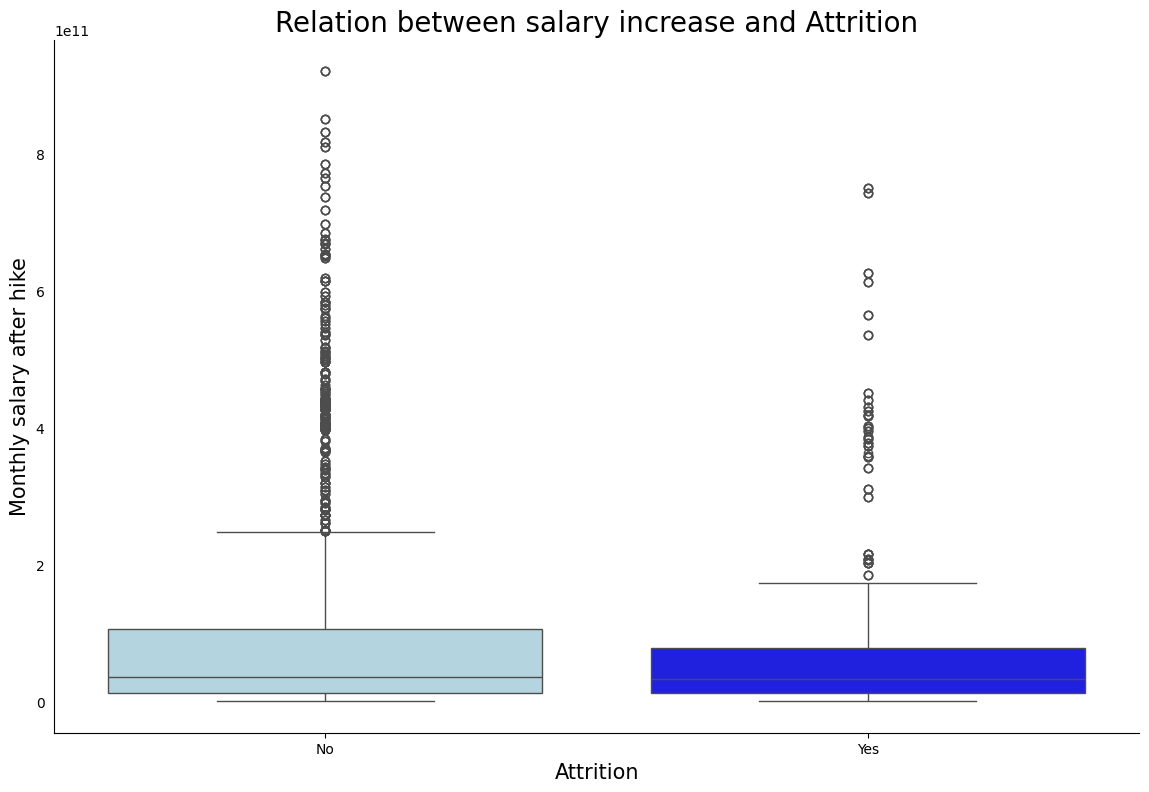

In [27]:
# and here i will visualize the range of salaries of both groups using boxplots

# the steps are familiar with the previous boxplots we made
plt.figure(figsize=(14,9))
Color = { 'Yes': 'blue', 'No' : 'lightblue'}
sns.boxplot(x='Attrition', y='salary + hike', data = df, hue='Attrition', palette = Color)
plt.tick_params(axis='y', bottom=False, left=False)
plt.title('Relation between salary increase and Attrition', fontsize=20)
plt.xlabel('Attrition', fontsize=15)
plt.ylabel('Monthly salary after hike', fontsize=15)
sns.despine()

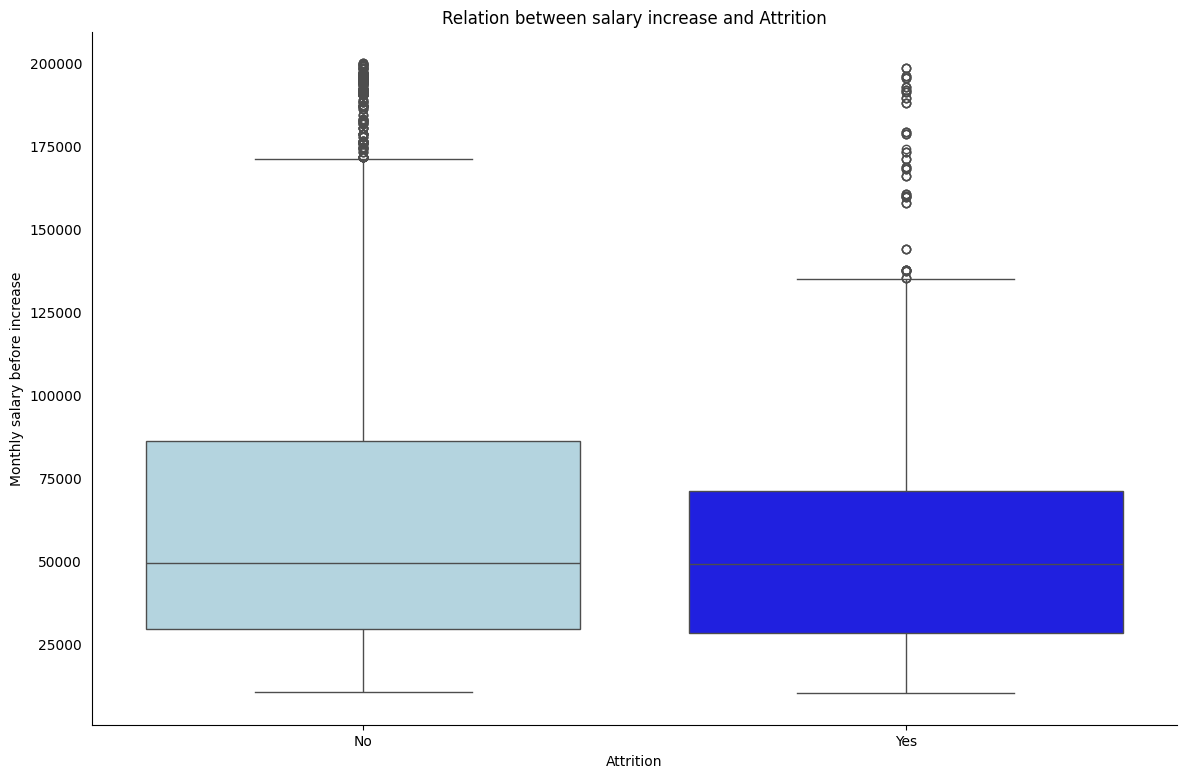

In [28]:
# here i will compare both groups to how they were earning before the hike
# the steps are familiar with the previous code block
plt.figure(figsize=(14,9))
Color = { 'Yes': 'blue', 'No' : 'lightblue'}
sns.boxplot(x='Attrition', y='MonthlyIncome', data = df, hue='Attrition', palette = Color)
plt.tick_params(axis='y', bottom=False, left=False)
plt.title('Relation between salary increase and Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly salary before increase')
sns.despine()

6) Check if the company is making more time in training employees that left

Text(0.5, 1.0, 'Percentages of years of training for employees that left')

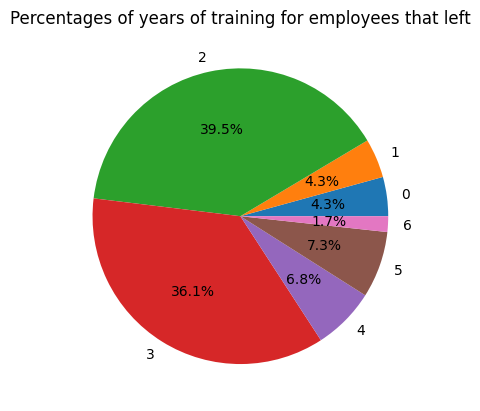

In [22]:
# Here i will make pie charts for both groups of employees
# to see if employees with more or less training are leaving the company or staying

# i will use 'groupby' function to divide the pie to parts resmebling years of training
# assign the attrition value to 'yes' which means left the company
# and count to get the frequency to later get percetage of each training year for the times where attrition vlaue was 'yes'
# this code is for the employees that left
Attrition_and_trianingyears_Left = df[df['Attrition'] == 'Yes'].groupby(df['TrainingTimesLastYear'])['Attrition'].count()
# using 'autopct' to show percentage, and remove any lables
Attrition_and_trianingyears_Left.plot(kind='pie', autopct='%1.1f%%', label='')
plt.title('Percentages of years of training for employees that left')

Text(0.5, 1.0, 'Percentages of years of training for employees that stayed')

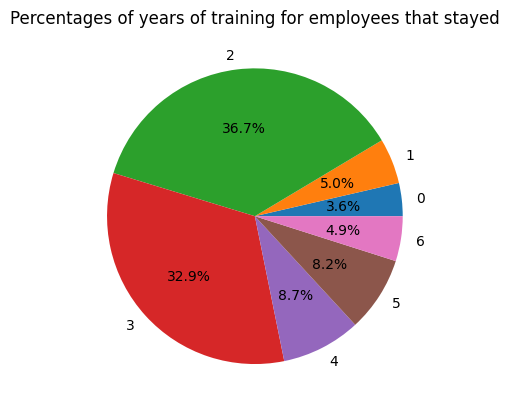

In [23]:
# doing the same thing for the other group

Attrition_and_trianingyears_stayed = df[df['Attrition'] == 'No'].groupby(df['TrainingTimesLastYear'])['Attrition'].count()
Attrition_and_trianingyears_stayed.plot(kind='pie',autopct='%1.1f%%',label='')
plt.title('Percentages of years of training for employees that stayed')

7) Relation between job satisfaction and working with current manager or before him

Text(0, 0.5, 'Years working with current manager')

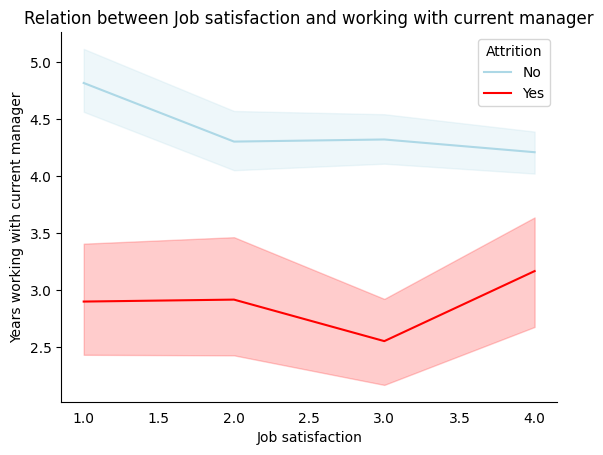

In [31]:
# here i will see if job satisfaction change when working with current manager or not
# first i will see the relation between job satisfaction and working with current manager
# and i will be using line chart
# make 2 line

C = {'No': 'Lightblue', 'Yes':'Red'}
sns.lineplot(x='JobSatisfaction', y='YearsWithCurrManager', data=df, hue='Attrition', palette=C)
plt.tick_params(bottom=False)
sns.despine()
plt.title('Relation between Job satisfaction and working with current manager')
plt.xlabel('Job satisfaction')
plt.ylabel('Years working with current manager')

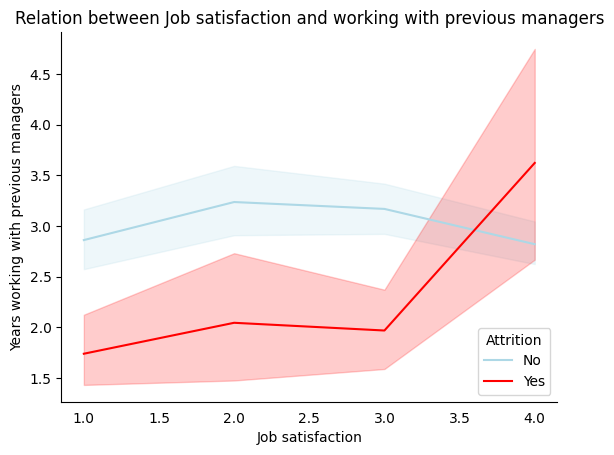

In [41]:
# Second i will see the relation between job satisfaction and working with previous managers
C = {'No': 'Lightblue', 'Yes':'Red'}
sns.lineplot(x='JobSatisfaction', y='yearsbeforelastmanager', data=df, hue='Attrition', palette=C)
plt.tick_params(bottom=False)
sns.despine()
plt.title('Relation between Job satisfaction and working with previous managers')
plt.xlabel('Job satisfaction')
plt.ylabel('Years working with previous managers')
# setting the place of the legedn with the title
plt.legend(title='Attrition', loc='lower right')

8) checking if the company lost employees that do better than the ones that stayed

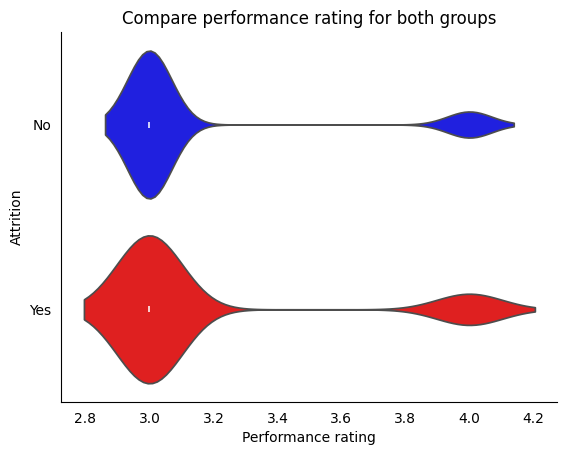

In [29]:
# here i will use violin plot to compare in performance between the groups of employees

# and i will use similar codes from before
violinplotcolors = {'No': 'Blue', 'Yes':'Red'}
# here i will make the violin plot
sns.violinplot(data=df, x='PerformanceRating', y='Attrition', hue='Attrition', palette=violinplotcolors)
plt.title('Compare performance rating for both groups')
plt.tick_params(bottom=False, left=False)
plt.xlabel('Performance rating')
plt.ylabel('Attrition')
sns.despine()

# Conclusion

# Here i will list the conclusion from each step and graph.

#and then i will give my own assessment and reccommendation

1_ Both groups of employees have similar average salaries, but the employees that stayed have more opportunities to earn more.

2_ Envirnoment and Job statisfaction are lower for employees that left the company, however, work life balance is not much different.

3_ Employees that left the company generally have longer time to get a promotion, even when they spent more time in the company.

4_ employees that left the company have spent on average 3 years before current manager, employees that stayed have spent around 5 years, both spent around 2 with the current manager

5_ both groups had bit similar salary before increase, after the increase with differnces in outliers, after tincrease the average salary become closer but outliers have risen.

6_ there is almost no difference in traninig years between employees that left or stayed

7_ We can clearly see how the employees that stayed in the company are more satisifed with the current managers than the employees that left, and employees who left the company were more as statisifed with previous managers the longer they stayed with them

8_ employees that left the company have a bit higher average and high performance than the ones that stayed in the company.

# Final conclusions:
#i will divide the final conlusions to 2 parts:

1_ Why are employees leaving:

Job and envirnoment satisfaction are the most obvious difference between employees that keft and stayed, as with other features we didn't get much differnt values, so it can be useful to give survey for employees to fill and see what things satisfy them or not, we can see that changing managers made a little effect on the employees that left as they didn't spend much time with them like previous ones.

2_is their causing damage to the company and wasting resources:

there is no significant loss to the company with the employees that are leaving the company, but its true that their more employees with average and high performance so these employees aren't unporoductive, and if better job conditins were offered than these emnployees might stay

Refrences for datasets:

Choudhary.V and Kumar.A, (2018), HR Analytics Case Study, Kaggle, Available at: https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study/data?select=general_data.csv (Accessed at: 27/02/2024)


Choudhary.V and Kumar.A, (2018), HR Analytics Case Study, Kaggle, Available at: https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study/data?select=employee_survey_data.csv (Accessed at: 27/02/2024)


Choudhary.V and Kumar.A, (2018), HR Analytics Case Study, Kaggle, Available at: https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study/data?select=manager_survey_data.csv (Accessed at: 27/02/2024)

